In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy import sparse
import shin_metiu_full as sf
import matplotlib as mpl

# import ipywidgets as widgets
import pandas as pd
import seaborn as sns

from ansatze import hweff_ansatz
from qiskit import Aer
from exact_simulator import prep_ham, simulation, inner
from helpers import read_files

from auto_plotter import autoplotter, prep_dfs
import warnings

mpl.rcParams['text.usetex'] = True

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")
sns.set_context(
    "talk",
    rc={
        "text.usetex": True,
        "font.size": 18,
        "axes.titlesize": 18,
        "axes.labelsize": 18,
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "legend.fontsize": 16,
        "legend.loc": "lower left",
        "legend.frameon": False,
        "font.family": "serif",
        "font.serif": "Times New Roman",
    },
)

backend = Aer.get_backend("statevector_simulator")
name1, name2 = 'Single', 'MD'

df1,df_coef1=read_files(100,1000,'results_helix/new/md/md_',ending='.json')
df2,df_coef2=read_files(100,1000,'results_helix/new/md100/md_',ending='.json')
df3,df_coef3=read_files(100,1000,'results_helix/new/md1000/md_',ending='.json')
df4,df_coef4=read_files(100,1000,'results_helix/new/md10000/md_',ending='.json')




/home/danielb/miniconda3/envs/qiskit/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Index(['Time', 'State', 'Sample', 'Type', 'Population', 'shots',
       'parameterized'],
      dtype='object')

In [2]:
df1['shots'] = 0
df2['shots'] = 100
df3['shots'] = 1000
df4['shots'] = 10000
df1['parameterized'] ='no'
df2['parameterized'] ='no'
df3['parameterized'] ='no'
df4['parameterized'] ='no'
df_coef1['shots'] = 0
df_coef2['shots'] = 100
df_coef3['shots'] = 1000
df_coef4['shots'] = 10000
df_coef1['parameterized'] ='no'
df_coef2['parameterized'] ='no'
df_coef3['parameterized'] ='no'
df_coef4['parameterized'] ='no'


dfs = pd.concat([df1,df2,df3,df4])
dfscoef = pd.concat([df_coef1,df_coef2,df_coef3,df_coef4])

In [3]:
mpl.rcParams['text.usetex'] = False
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 


In [18]:
dfscoef.query('State<2 & Population>1e-2&Type!="Exact" & parameterized=="no"')

,Time,State,Sample,Type,Population,shots,parameterized
1350000,0.0,0,0,Ideal,1.000000,0,no
1350015,0.5,0,0,Ideal,0.999998,0,no
1350030,1.0,0,0,Ideal,0.999992,0,no
1350045,1.5,0,0,Ideal,0.999981,0,no
1350060,2.0,0,0,Ideal,0.999967,0,no
...,...,...,...,...,...,...,...
1439956,498.5,1,31,TDVQP,0.616646,10000,no
1439970,499.0,0,31,TDVQP,0.186662,10000,no
1439971,499.0,1,31,TDVQP,0.615660,10000,no
1439985,499.5,0,31,TDVQP,0.186015,10000,no


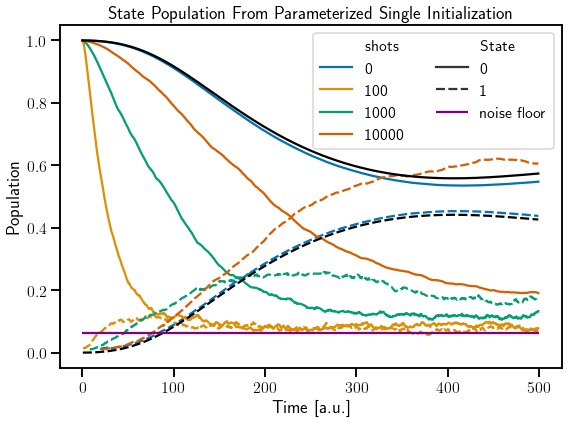

In [29]:
fig, ax = plt.subplots(figsize=((8, 6)))
sns.lineplot(data=dfscoef.query('State<2 & Population>1e-2&Type=="TDVQP" & parameterized=="no"'),x='Time',y='Population',hue='shots',style='State',ci=None,ax=ax,palette=sns.color_palette("colorblind"))
sns.lineplot(data=dfscoef.query('State<2 & Population>1e-6 &Type=="Ideal" & parameterized=="no"'),x='Time',y='Population',style='State',ci=None,ax=ax,legend=None,alpha=1,color='black')
plt.xlabel(r'Time [a.u.]')
# plt.ylim([1e-6,2])
# plt.yscale('log')
plt.title(r'State Population From Parameterized Single Initialization')
plt.hlines(0.0625,0,500,colors='purple',label='noise floor')
handles, labels = plt.gca().get_legend_handles_labels()
# Create legend

plt.legend(handles=handles, labels=labels, ncol=2)

plt.tight_layout()
# plt.savefig('./custom_plots/single_populations.pdf')

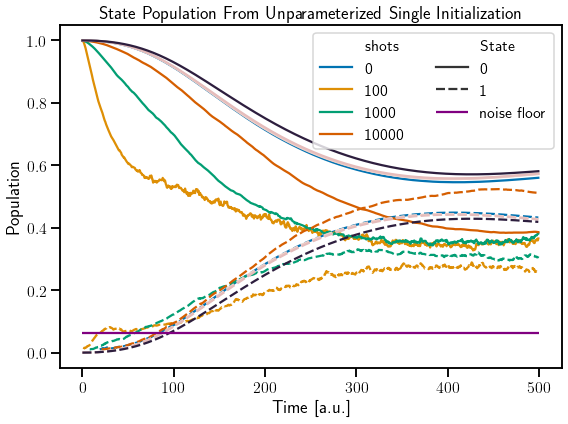

In [4]:
fig, ax = plt.subplots(figsize=((8, 6)))
sns.lineplot(data=dfscoef.query('State<2 & Population>1e-2&Type!="Exact" & parameterized=="no"'),x='Time',y='Population',hue='shots',style='State',ci=None,ax=ax,palette=sns.color_palette("colorblind"))
sns.lineplot(data=dfscoef.query('State<2 & Population>1e-6 &Type=="Exact" & parameterized=="no"'),x='Time',y='Population',hue='shots',style='State',ci=None,ax=ax,legend=None,alpha=1)
plt.xlabel(r'Time [a.u.]')
# plt.ylim([1e-6,2])
# plt.yscale('log')
plt.title(r'State Population From Unparameterized Single Initialization')
plt.hlines(0.0625,0,500,colors='purple',label='noise floor')
handles, labels = plt.gca().get_legend_handles_labels()

# Create legend
plt.legend(handles=handles, labels=labels, ncol=2)

plt.tight_layout()
# plt.savefig('./custom_plots/single_populations.pdf')

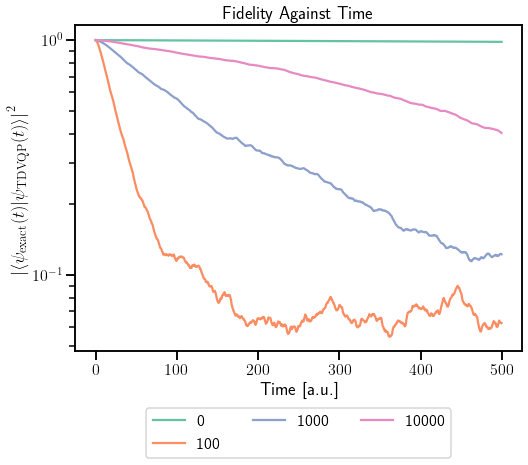

In [6]:
fig, ax = plt.subplots(nrows=1,figsize=((8, 6)))

sns.lineplot(data=dfs, x="times", y="fidelity_to_exact", ci=None, ax=ax, palette="Set2",hue='shots')
ax.set(ylabel=r'$\left |\langle\psi_\mathrm{exact}(t)|\psi_\mathrm{TDVQP}(t)\rangle\right |^2 $',xlabel= r'Time [a.u.]')
ax.set_title('Fidelity Against Time')

handles, labels = plt.gca().get_legend_handles_labels()

plt.yscale('log')
plt.legend(handles=handles, labels=labels, ncol=3,bbox_to_anchor=(0.5, -0.15), loc='upper center')


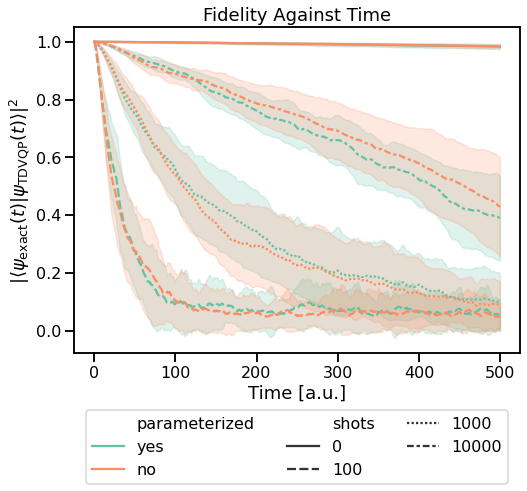

In [23]:
fig, ax = plt.subplots(nrows=1,figsize=((8, 6)))

sns.lineplot(data=dfs, x="times", y="fidelity_to_exact", ci='sd', ax=ax, palette="Set2",style='shots',hue='parameterized')
ax.set(ylabel=r'$\left |\langle\psi_\mathrm{exact}(t)|\psi_\mathrm{TDVQP}(t)\rangle\right |^2 $',xlabel= r'Time [a.u.]')
ax.set_title('Fidelity Against Time')

handles, labels = plt.gca().get_legend_handles_labels()

# Create legend
plt.legend(handles=handles, labels=labels, ncol=3,bbox_to_anchor=(0.5, -0.15), loc='upper center')



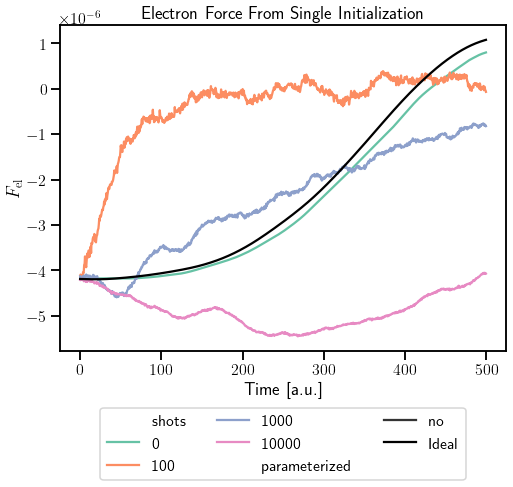

In [7]:
fig, ax = plt.subplots(figsize=((8, 6)))
# sns.lineplot(data=sdf, x="times", y="QC_forces_el", ax=ax, units="sample", estimator=None, alpha=0.05,label=None)
# plt.legend('')
sns.lineplot(data=dfs, x="times", y="QC_forces_el", ci=None, ax=ax, palette="Set2",style="parameterized",hue='shots')
sns.lineplot(data=df1, x="times", y="exact_forces_el", ci=None, ax=ax,color='black', label='Ideal')
# handles, labels = ax.get_legend_handles_labels()
# l = plt.legend([handles[i] for i in [0,1,3]], [labels[i] for i in [0,1,3]])

ax.set(ylabel='$F_\mathrm{el}$',xlabel= r'Time [a.u.]',title='Electron Force From Single Initialization')
# plt.savefig("custom_plots/S_force_long.pdf")
handles, labels = plt.gca().get_legend_handles_labels()

plt.legend(handles=handles, labels=labels, ncol=3,bbox_to_anchor=(0.5, -0.15), loc='upper center')


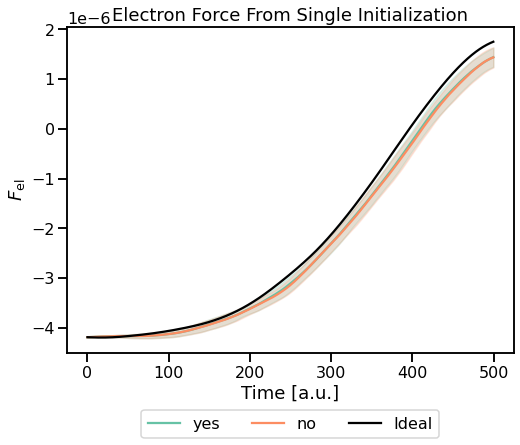

In [42]:
fig, ax = plt.subplots(figsize=((8, 6)))
sns.lineplot(data=dfs.query('shots==0'), x="times", y="QC_forces_el", ci='sd', ax=ax, palette="Set2",hue="parameterized")
sns.lineplot(data=df1, x="times", y="exact_forces_el", ci=None, ax=ax,color='black', label='Ideal')
ax.set(ylabel='$F_\mathrm{el}$',xlabel= r'Time [a.u.]',title='Electron Force From Single Initialization')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, ncol=3,bbox_to_anchor=(0.5, -0.15), loc='upper center')


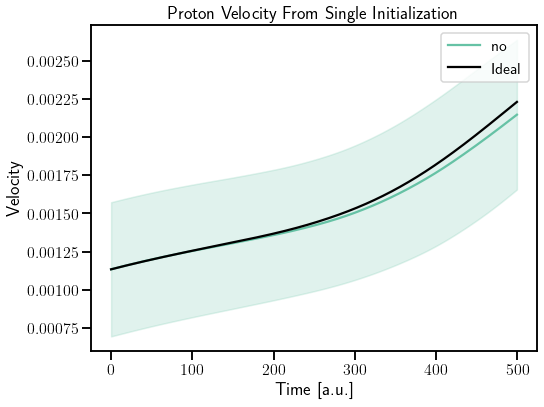

In [8]:
fig, ax = plt.subplots(figsize=((8, 6)))
sns.lineplot(data=dfs.query('shots==0'), x="times", y="QC_velocities", ci='sd', ax=ax, palette="Set2",hue="parameterized")
sns.lineplot(data=df1, x="times", y="exact_velocities", ci=None, ax=ax,color='black', label='Ideal')
ax.set(ylabel='Velocity',xlabel= r'Time [a.u.]',title='Proton Velocity From Single Initialization')
handles, labels = plt.gca().get_legend_handles_labels()
# plt.legend(handles=handles, labels=labels, ncol=3,bbox_to_anchor=(0.5, -0.15), loc='upper center')


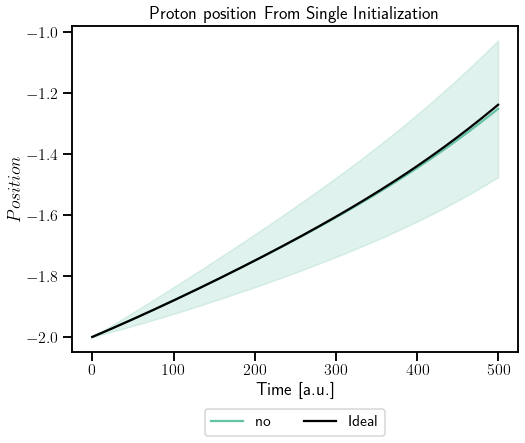

In [9]:
fig, ax = plt.subplots(figsize=((8, 6)))
sns.lineplot(data=dfs.query('shots==0'), x="times", y="QC_positions", ci='sd', ax=ax, palette="Set2",hue="parameterized")
sns.lineplot(data=df1, x="times", y="exact_positions", ci=None, ax=ax,color='black', label='Ideal')
ax.set(ylabel='$Position$',xlabel= r'Time [a.u.]',title='Proton position From Single Initialization')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, ncol=3,bbox_to_anchor=(0.5, -0.15), loc='upper center')


[Text(0, 0.5, '$F_\\mathrm{el}$'),
 Text(0.5, 0, 'Time [a.u.]'),
 Text(0.5, 1.0, 'Electron Force From Single Initialization')]

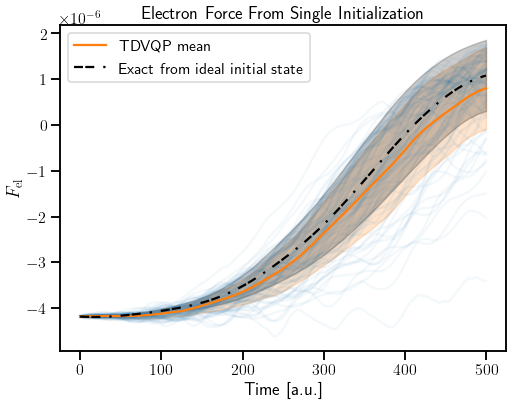

In [10]:

fig, ax = plt.subplots(figsize=((8, 6)))
sns.lineplot(data=df1, x="times", y="QC_forces_el", ax=ax, units="sample", estimator=None, alpha=0.05,label=None)
sns.lineplot(data=df1, x="times", y="QC_forces_el", errorbar=("sd",1), estimator=np.mean, ax=ax, alpha=1, label = 'TDVQP mean')
sns.lineplot(data=df1, x="times", y="ideal_forces_el", errorbar="sd", ax=ax,color='black', label='Exact from ideal initial state',style='err_energy', dashes=[(4,1,4)])
handles, labels = ax.get_legend_handles_labels()

l = plt.legend([handles[i] for i in [0,1]], [labels[i] for i in [0,1]])
ax.set(ylabel='$F_\mathrm{el}$',xlabel= r'Time [a.u.]',title='Electron Force From Single Initialization')
# plt.savefig("custom_plots/S_force_long.pdf")

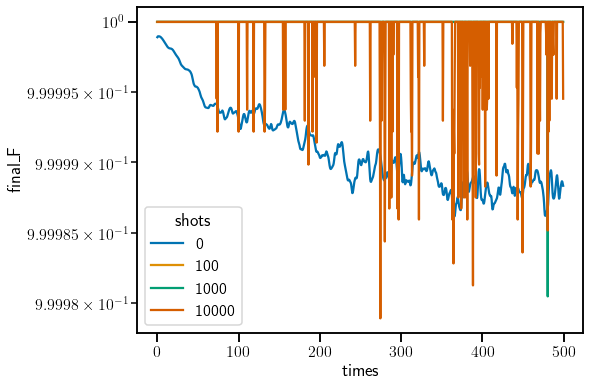

In [16]:
fig, ax = plt.subplots(figsize=((8, 6)))
sns.lineplot(data=dfs, x="times", y="final_F", ax=ax,ci=None,  estimator=np.mean,hue='shots',palette='colorblind')

plt.yscale('log')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=((10, 10)))

df['diff_pos'] = (df['QC_positions']-df["ideal_positions"])**2
sns.lineplot(
    data=df, x="times", y="diff_pos", errorbar=(lambda x: (np.percentile(x, 25), np.percentile(x, 75))), estimator=np.mean, ax=ax, alpha=1, label = 'QC mean'
)

ax.set_ylabel('RMS Difference in nuclear Position')
plt.show()

<AxesSubplot: xlabel='QC_velocities', ylabel='Count'>

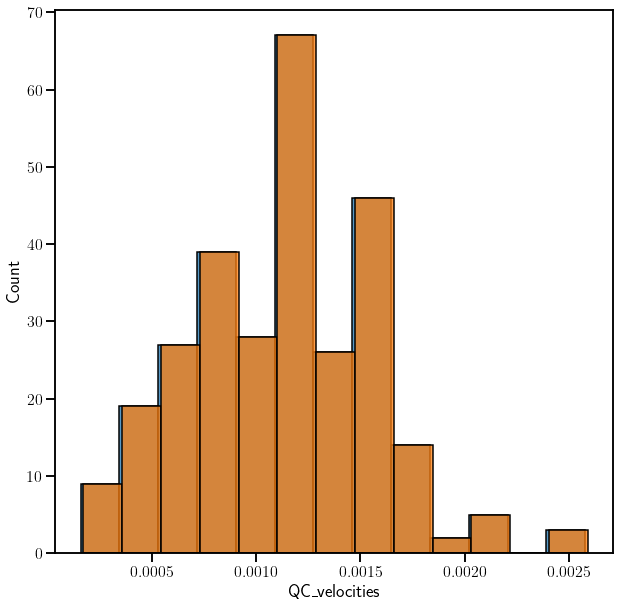

In [14]:
fig, ax = plt.subplots(figsize=((10, 10)))
sns.histplot(data=dfs.query('times==0'), x="QC_velocities",ax=ax)
sns.histplot(data=dfs.query('times==10'), x="ideal_velocities",ax=ax)

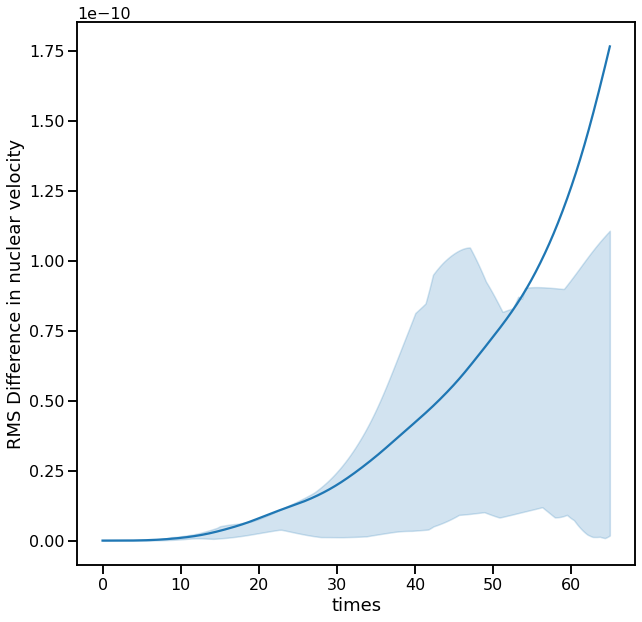

In [10]:
fig, ax = plt.subplots(figsize=((10, 10)))

df['diff_vel'] = (df['QC_velocities']-df["ideal_velocities"])**2
sns.lineplot(
    data=df, x="times", y="diff_vel", errorbar=(lambda x: (np.percentile(x, 25), np.percentile(x, 75))), estimator=np.mean, ax=ax, alpha=1, #label = 'QC mean'
)

ax.set_ylabel('RMS Difference in nuclear velocity')
plt.show()

In [ ]:
def plot(p,y,sc0,sc1):
    fig = plt.figure()
    gs = fig.add_gridspec(2, hspace=0.1, height_ratios=[2, 1])
    axs = gs.subplots(sharex=True)
    fig.suptitle(p)
    df[f'diff_{p}']=np.sqrt((df[f"exact_{p}"] - df[f"QC_{p}"])**2)
    sns.lineplot(ax=axs[1],data=df,x=f'times',y=f'diff_{p}',legend=None)
    sns.lineplot(ax=axs[0],
        data=df,y=f"exact_{p}",x='times',
        color="black",
        label="Exact",
    )
    sns.lineplot(ax=axs[0],
        data=df,y=f"QC_{p}",x='times',
        color="red",
        label="TDVQP",
    )
    axs[1].set_ylabel(f'RMSD ${sc1}$')
    axs[0].set_ylabel(f'{y} [a.u.] ${sc0}$')
    axs[0].set_xlabel('Time [a.u.]')
    axs[1].set_xlabel('Time [a.u.]')

    axs[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axs[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    # axs[0].set_yscale('log')
    # axs[0].legend()
    # axs[1].legend(loc=4)
    # axs[0].set_yscale('log')
    # axs[1].set_yscale("log")
    plt.tight_layout()
    plt.show()
    
plot("velocities",'Velocity','\\cdot10^{-1}','\\cdot10^{-5}')

In [ ]:
plot("positions",'Position','\\cdot10^{0}','\\cdot10^{-5}')

In [ ]:
plot("positions",'Position','\\cdot10^{sc1}','\\cdot10^{-4}')